In [1]:
import cv2
import numpy as np
#import paho.mqtt.client as mqtt
import time
import matplotlib.pyplot as plt
import os
import argparse
import imutils

# 1

In [33]:
# load the image and convert it to grayscale
image = cv2.imread("../Gauge/frames/frame1.jpg")


In [34]:
img = np.power(image,[1.5, 1.0, 1.0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


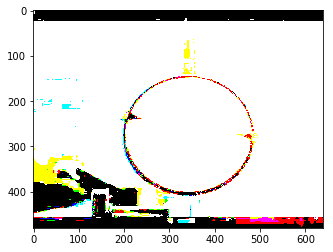

In [35]:
plt.imshow(img)

# 2

In [10]:
cap=cv2.VideoCapture("../Gauge/video.mp4")

"""if cap.isOpened():
    ret, frame = cap.read()
else:
    ret=False"""
    
while True:
    ret, frame = cap.read()
    
    
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(grey)
    #bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15, -2)
    (thresh, dst2) = cv2.threshold(grey, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    dst2 = cv2.dilate(dst2, None, iterations=2)
    cnts = cv2.findContours(dst2.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    for c in cnts:
        # if the contour is too small, ignore it
        if cv2.contourArea(c) < 10:
            continue
 
        # compute the bounding box for the contour, draw it on the frame,
        # and update the text
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = "Occupied"
        
    edges=cv2.Canny(dst2,50,250,apertureSize=5,L2gradient=True)
    minLineLength = 10
    maxLineGap = 0
    lines = cv2.HoughLinesP(image=edges, rho=3, theta=np.pi / 180, threshold=100,minLineLength=minLineLength, maxLineGap=0)
    #print(lines[0])
    for _,rho, theta,th in lines[0]:
        a=np.cos(theta)
        b=np.sin(theta)
        x0=a*rho
        y0=b*rho
        pts1=(int(x0 + 1000*(-b)),int(y0 + 1000*(a)))
        pts2=(int(x0 - 1000*(-b)),int(y0 - 1000*(a)))
        cv2.line(frame,pts1,pts2,(0,255,0),3)
    
    cv2.imshow("",frame)
    
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cap.release()

# 3

In [59]:
img = cv2.imread("../Gauge/frames/frame1.jpg")

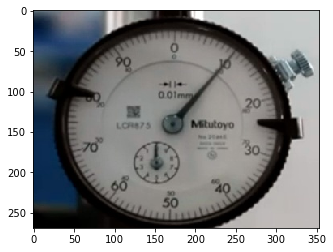

In [74]:
# Select ROI
r = cv2.selectROI(img)
 
# Crop image
imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

# Display cropped image
plt.imshow(imCrop)

In [15]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))
    return avg_x, avg_y, avg_r

In [26]:
img = cv2.imread('../Gauge/frames/frame1.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,80)
print("CIRCLES", circles)
a, b, c = circles.shape
x,y,r = avg_circles(circles, b)


circles = np.uint16(np.around(circles))
cv2.circle(img, (x, y), r, (0, 0, 255), 3, cv2.LINE_AA)  # draw circle
cv2.circle(img, (x, y), 2, (0, 255, 0), 3, cv2.LINE_AA)  # draw center of circle
print(circles)

cropSize = (500, 700) # <- added: what size do you want to extract

for i in circles[0,:]:
    print("I", i)
    #crop ROI around circle...?
    # make sure the bounds won't under-/overflow
    cropCoords = (max(0, i[1]-cropSize[0]//2),min(img.shape[0], i[1]+cropSize[0]//2),
                  max(0, i[0]-cropSize[1]//2),min(img.shape[1], i[0]+cropSize[1]//2)) 
    crop_cimg = cimg[cropCoords[0]:cropCoords[1],
                     cropCoords[2]:cropCoords[3]] 


cv2.imshow('detected circles',crop_cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

CIRCLES [[[0. 0. 0.]]]
[[[0 0 0]]]
I [0 0 0]


In [49]:
for i in circles[0,:]:
    print(i)

[0 0 0]


In [33]:
circles.shape

(1, 1, 3)

In [47]:
circles[0,:][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

# 4

In [11]:
def dist_2_pts(x1, y1, x2, y2):
    #print np.sqrt((x2-x1)^2+(y2-y1)^2)
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [10]:

cap = cv2.VideoCapture('../Gauge/Video1.wmv')
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    dst3 = cv2.medianBlur(fgmask, 5)
    dst3 = cv2.GaussianBlur(dst3, (5, 5), 2)
    #dst3 = cv2.Canny(dst3, 50, 150)
    cv2.imshow('frame',dst3)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

# 5

In [6]:
cap = cv2.VideoCapture('../Gauge/video.mp4')

fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('../Gauge/video.mp4')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

# 6

In [2]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


(480, 864)
[55.03566837310791, 48.0, 50.0, 50.0, 48.0, 62.470767974853516, 81.0990195274353, 55.031219482421875, 52.0, 60.13274574279785, 51.03840446472168, 58.0, 2360.3783869743347, 36.60682392120361, 38.114850997924805, 11.661903381347656]
2360.3783869743347
12


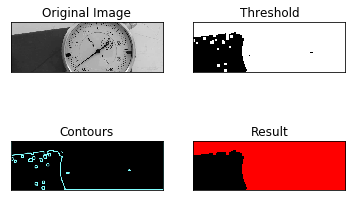

In [6]:


img = cv2.imread('../Gauge/frames/Video1/frame250.jpg',0)
print (img.shape)
h, w = img.shape[:2]

# Drop top and bottom area of image with black parts.
img= img[100:h-100, :]
h, w = img.shape[:2]

# Threshold image
ret,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)

# get rid of thinner lines
kernel = np.ones((5,5),np.uint8)
th1 = cv2.dilate(th1,kernel,iterations = 3)

# Determine contour of all blobs found
contours0, hierarchy = cv2.findContours( th1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

# Draw all contours
vis = np.zeros((h, w, 3), np.uint8)
cv2.drawContours( vis, contours, -1, (128,255,255), 3, cv2.LINE_AA)

# Draw the contour with maximum perimeter (omitting the first contour which is outer boundary of image
# Not necessary in this case
vis2 = np.zeros((h, w, 3), np.uint8)
perimeter=[]
for cnt in contours[1:]:
    perimeter.append(cv2.arcLength(cnt,True))
print (perimeter)
print (max(perimeter))
maxindex= perimeter.index(max(perimeter))
print (maxindex)

cv2.drawContours( vis2, contours, maxindex +1, (255,0,0), -1)


# Show all images
titles = ['Original Image','Threshold','Contours', 'Result']
images=[img, th1, vis, vis2]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
plt.show()